<a href="https://colab.research.google.com/github/opanneh/Pa-Ous/blob/master/Copy_of_super_store_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/Superstore Sales Analysis/train.csv")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# filling null values
df["Postal Code"].fillna(0, inplace=True)

<ipython-input-144-89b2b592e0f8>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df["Postal Code"]=df["Postal Code"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# checking for duplictes
if df.duplicated().sum() > 0:
  print("There are duplicates in the dataset")
else:
  print("There are no duplicates in the dataset")

There are no duplicates in the dataset


In [ ]:
# types of customers
types_of_customers = df["Segment"].unique()
print(types_of_customers)


['Consumer' 'Corporate' 'Home Office']


In [ ]:
# number of customers
number_of_customers = df["Segment"].value_counts().reset_index()
print(number_of_customers)

       Segment  count
0     Consumer   5101
1    Corporate   2953
2  Home Office   1746


In [ ]:
# rest index and create new columns
number_of_customers = df["Segment"].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={"Segment": "Type of Customers"})
print(number_of_customers)

  Type of Customers  count
0          Consumer   5101
1         Corporate   2953
2       Home Office   1746


([<matplotlib.patches.Wedge at 0x7c84b43da510>,
 [Text(-0.07082912490696024, 1.0977172837597642, 'Consumer'),
  Text(-0.5228074564626142, -0.9678183525161589, 'Corporate'),
  Text(0.9321462195039758, -0.5840406025820858, 'Home Office')],
 [Text(-0.03863406813106921, 0.5987548820507803, '52.1%'),
  Text(-0.28516770352506227, -0.5279009195542684, '30.1%'),
  Text(0.508443392456714, -0.3185676014084104, '17.8%')])

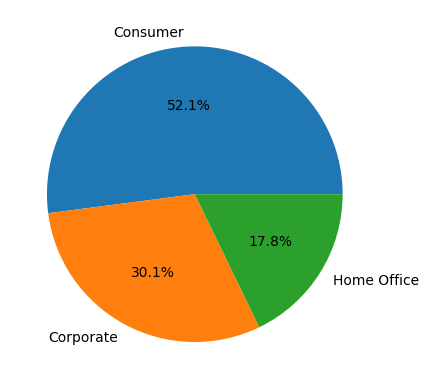

In [ ]:
plt.pie(number_of_customers['count'], labels=number_of_customers["Type of Customers"], autopct="%1.1f%%")


In [ ]:
# sales per customer type
sales_per_segment = df.groupby("Segment")["Sales"].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Type Of Customer', 'Sales' : 'Total Sales'})
print(sales_per_segment)

  Type Of Customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


<BarContainer object of 3 artists>

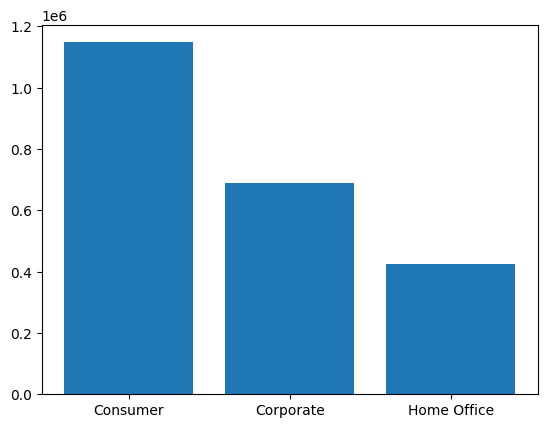

In [ ]:
plt.bar(sales_per_segment["Type Of Customer"], sales_per_segment["Total Sales"])

([<matplotlib.patches.Wedge at 0x7c84b272a5d0>,
 [Text(-0.026420901678353936, 1.099682652384088, 'Consumer'),
  Text(-0.5902004249314667, -0.9282582929393717, 'Corporate'),
  Text(0.9138143750681164, -0.6123261287246105, 'Home Office')],
 [Text(-0.01441140091546578, 0.5998269013004115, '50.8%'),
  Text(-0.3219275045080727, -0.5063227052396572, '30.4%'),
  Text(0.49844420458260885, -0.3339960702134238, '18.8%')])

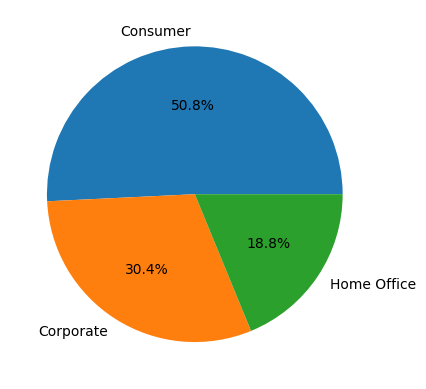

In [ ]:
# pie chart of sales
plt.pie(sales_per_segment["Total Sales"], labels=sales_per_segment["Type Of Customer"], autopct="%1.1f%%")

In [ ]:
# customer loyalty
customers_order_frequency = df.groupby(["Customer ID", "Customer Name", "Segment"])["Order ID"].count().reset_index()
print(customers_order_frequency)


    Customer ID       Customer Name    Segment  Order ID
0      AA-10315          Alex Avila   Consumer        11
1      AA-10375        Allen Armold   Consumer        15
2      AA-10480        Andrew Allen   Consumer        12
3      AA-10645       Anna Andreadi   Consumer        18
4      AB-10015       Aaron Bergman   Consumer         6
..          ...                 ...        ...       ...
788    XP-21865        Xylona Preis   Consumer        28
789    YC-21895      Yoseph Carroll  Corporate         8
790    YS-21880       Yana Sorensen  Corporate        12
791    ZC-21910    Zuschuss Carroll   Consumer        31
792    ZD-21925  Zuschuss Donatelli   Consumer         9

[793 rows x 4 columns]


In [ ]:
# customer loyalty
customers_order_frequency = df.groupby(["Customer ID", "Customer Name", "Segment"])["Order ID"].count().reset_index()
# Check if customers_order_frequency is None or empty
if customers_order_frequency is None or customers_order_frequency.empty:
    print("Warning: customers_order_frequency is empty or None. Check your data or previous operations.")
else:
    print(customers_order_frequency)
    customers_order_frequency.rename(columns={"Order ID" : "Total Orders"}, inplace=True)


    Customer ID       Customer Name    Segment  Order ID
0      AA-10315          Alex Avila   Consumer        11
1      AA-10375        Allen Armold   Consumer        15
2      AA-10480        Andrew Allen   Consumer        12
3      AA-10645       Anna Andreadi   Consumer        18
4      AB-10015       Aaron Bergman   Consumer         6
..          ...                 ...        ...       ...
788    XP-21865        Xylona Preis   Consumer        28
789    YC-21895      Yoseph Carroll  Corporate         8
790    YS-21880       Yana Sorensen  Corporate        12
791    ZC-21910    Zuschuss Carroll   Consumer        31
792    ZD-21925  Zuschuss Donatelli   Consumer         9

[793 rows x 4 columns]


In [ ]:
repeat_customers = customers_order_frequency[customers_order_frequency["Total Orders"] > 1]
print(repeat_customers)

    Customer ID       Customer Name    Segment  Total Orders
0      AA-10315          Alex Avila   Consumer            11
1      AA-10375        Allen Armold   Consumer            15
2      AA-10480        Andrew Allen   Consumer            12
3      AA-10645       Anna Andreadi   Consumer            18
4      AB-10015       Aaron Bergman   Consumer             6
..          ...                 ...        ...           ...
788    XP-21865        Xylona Preis   Consumer            28
789    YC-21895      Yoseph Carroll  Corporate             8
790    YS-21880       Yana Sorensen  Corporate            12
791    ZC-21910    Zuschuss Carroll   Consumer            31
792    ZD-21925  Zuschuss Donatelli   Consumer             9

[787 rows x 4 columns]


In [ ]:
repeat_customers_sorted = repeat_customers.sort_values(by="Total Orders", ascending=False)
print(repeat_customers_sorted)

    Customer ID      Customer Name      Segment  Total Orders
787    WB-21850      William Brown     Consumer            35
482    MA-17560       Matt Abelman  Home Office            34
606    PP-18955         Paul Prost  Home Office            34
387    JL-15835           John Lee     Consumer            33
720    SV-20365        Seth Vernon     Consumer            32
..          ...                ...          ...           ...
650    RM-19750      Roland Murray     Consumer             2
97     BO-11425      Bobby Odegard     Consumer             2
693    SH-20635  Stefanie Holloman    Corporate             2
337    IM-15055      Ionia McGrath     Consumer             2
49     AR-10570     Anemone Ratner     Consumer             2

[787 rows x 4 columns]


In [ ]:
# top twelve customers
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     MA-17560         Matt Abelman  Home Office            34
2     PP-18955           Paul Prost  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     SV-20365          Seth Vernon     Consumer            32
5     JD-15895     Jonathan Doherty    Corporate            32
6     CK-12205  Chloris Kastensmidt     Consumer            32
7     AP-10915       Arthur Prichep     Consumer            31
8     EP-13915           Emily Phan     Consumer            31
9     ZC-21910     Zuschuss Carroll     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    GT-14710            Greg Tran     Consumer            29


In [ ]:
# top spending customers
customer_sales = df.groupby(["Customer ID", "Customer Name", "Segment"])["Sales"].sum().reset_index()
top_spenders = customer_sales.sort_values(by="Sales", ascending=False)

In [ ]:
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


In [ ]:
# shipping method
shipping_model = df["Ship Mode"].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={"index" : "Use Frequency", "Ship Mode" : "Mode of Shipment"})
print(shipping_model)



  Mode of Shipment  count
0   Standard Class   5859
1     Second Class   1902
2      First Class   1501
3         Same Day    538


In [ ]:
# Count and reset the index
shipping_model = df["Ship Mode"].value_counts().reset_index()

In [ ]:
# Display the DataFrame before renaming (for debugging)
print("Before renaming:")
print(shipping_model)

Before renaming:
        Ship Mode  count
0  Standard Class   5859
1    Second Class   1902
2     First Class   1501
3        Same Day    538


In [ ]:
# Rename the columns
shipping_model = shipping_model.rename(columns={"Ship Mode": "Mode of Shipment"})

# Verify the columns after renaming
print("After renaming:")
print(shipping_model.columns)
print(shipping_model)

After renaming:
Index(['Mode of Shipment', 'count'], dtype='object')
  Mode of Shipment  count
0   Standard Class   5859
1     Second Class   1902
2      First Class   1501
3         Same Day    538


([<matplotlib.patches.Wedge at 0x7c84b2790850>,
 [Text(-0.33286822443706726, 1.0484267953272248, 'Standard Class'),
  Text(-0.37327504859675137, -1.034729789894489, 'Second Class'),
  Text(0.7455147818297655, -0.8088310763523601, 'First Class'),
  Text(1.083680824088883, -0.18877465799741078, 'Same Day')],
 [Text(-0.18156448605658213, 0.5718691610875771, '59.8%'),
  Text(-0.20360457196186435, -0.5643980672151757, '19.4%'),
  Text(0.4066444264525993, -0.44118058710128727, '15.3%'),
  Text(0.5910986313212089, -0.10296799527131496, '5.5%')])

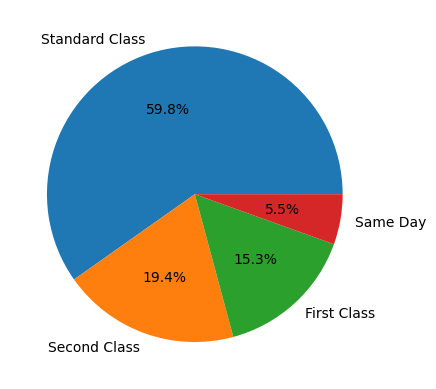

In [ ]:
plt.pie(shipping_model["count"], labels=shipping_model["Mode of Shipment"], autopct="%1.1f%%")

In [ ]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index': 'State', 'State': 'Number of Customers'})
print(state.head(25))

   Number of Customers  count
0           California   1946
1             New York   1097
2                Texas    973
3         Pennsylvania    582
4           Washington    504
5             Illinois    483
6                 Ohio    454
7              Florida    373
8             Michigan    253
9       North Carolina    247
10            Virginia    224
11             Arizona    223
12           Tennessee    183
13            Colorado    179
14             Georgia    177
15            Kentucky    137
16             Indiana    135
17       Massachusetts    135
18              Oregon    122
19          New Jersey    122
20            Maryland    105
21           Wisconsin    105
22            Delaware     93
23           Minnesota     89
24         Connecticut     82


In [ ]:
city = df['City'].value_counts().reset_index()
print(city.head(25))

             City  count
0   New York City    891
1     Los Angeles    728
2    Philadelphia    532
3   San Francisco    500
4         Seattle    426
5         Houston    374
6         Chicago    308
7        Columbus    221
8       San Diego    170
9     Springfield    161
10         Dallas    156
11   Jacksonville    125
12        Detroit    115
13         Newark     92
14        Jackson     82
15       Columbia     81
16       Richmond     81
17         Aurora     68
18        Phoenix     63
19      Arlington     60
20    San Antonio     59
21          Miami     56
22     Louisville     54
23      Rochester     53
24     Long Beach     52


In [ ]:
# sales per state
sales_per_state = df.groupby("State")["Sales"].sum().reset_index()
top_sales_per_state = sales_per_state.sort_values(by="Sales", ascending=False)
print(top_sales_per_state.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [ ]:
# city sales
city_sales = df.groupby("City")["Sales"].sum().reset_index()
top_city_sales = city_sales.sort_values(by="Sales", ascending=False)
print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


In [ ]:
# product types
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [ ]:
# product sub-categories
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [ ]:
# sub-category sales
sub_category_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
sub_category_sales = sub_category_sales.sort_values(by='Sales', ascending=False)

In [ ]:
print(sub_category_sales)

           Category Sub-Category        Sales
16       Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
11  Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
6   Office Supplies      Binders  200028.7850
15       Technology     Machines  189238.6310
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
0         Furniture    Bookcases  113813.1987
4   Office Supplies   Appliances  104618.4030
2         Furniture  Furnishings   89212.0180
10  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
5   Office Supplies          Art   26705.4100
7   Office Supplies    Envelopes   16128.0460
9   Office Supplies       Labels   12347.7260
8   Office Supplies    Fasteners    3001.9600


In [ ]:
# product category sales
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
top_category_sales = category_sales.sort_values(by='Sales', ascending=False)

print(top_category_sales)

          Category        Sales
2       Technology  827455.8730
0        Furniture  728658.5757
1  Office Supplies  705422.3340


([<matplotlib.patches.Wedge at 0x7c84b25e5050>,
 [Text(0.44988564266575465, 1.0037942560720405, 'Technology'),
  Text(-1.0842320951134052, -0.18558222955335987, 'Furniture'),
  Text(0.6127885417845869, -0.9135043530588783, 'Office Supplies')],
 [Text(0.24539216872677524, 0.5475241396756584, '36.6%'),
  Text(-0.5913993246073119, -0.101226670665469, '32.2%'),
  Text(0.33424829551886553, -0.49827510166847905, '31.2%')])

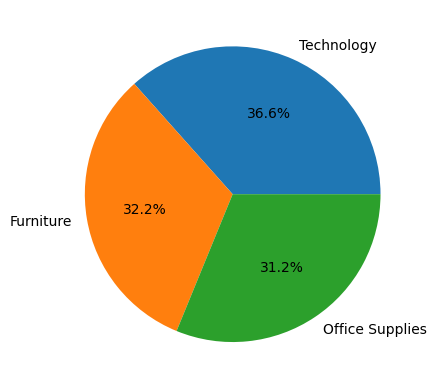

In [ ]:
plt.pie(top_category_sales['Sales'], labels=top_category_sales['Category'], autopct="%1.1f%%")

<BarContainer object of 17 artists>

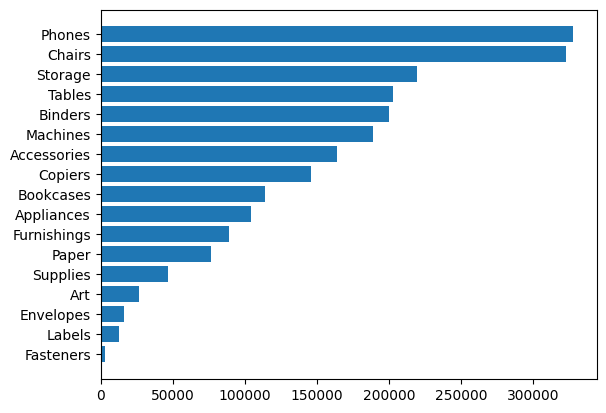

In [ ]:
sub_category_sales = sub_category_sales.sort_values(by='Sales', ascending=True)
plt.barh(sub_category_sales['Sub-Category'], sub_category_sales['Sales'])

In [ ]:
# yearly sales
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales': 'Total Sales'})
print(yearly_sales)


   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


<BarContainer object of 4 artists>

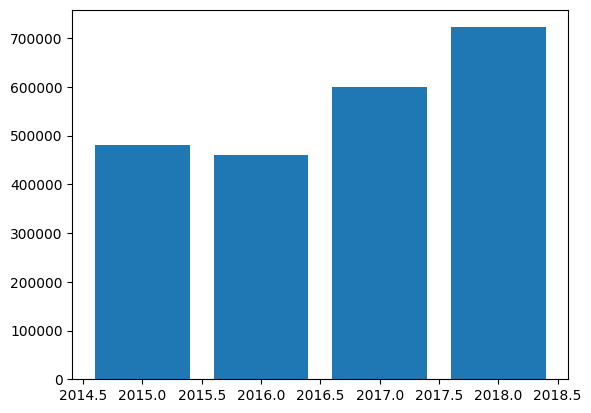

In [ ]:
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

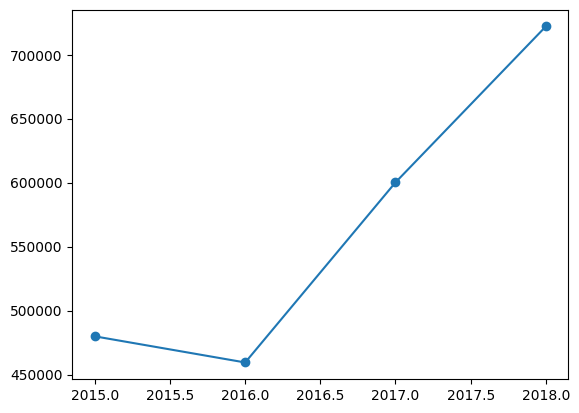

In [ ]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date': 'Month', 'Sales': 'Total Sales'})
# Convert 'Month' column to strings for plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str)


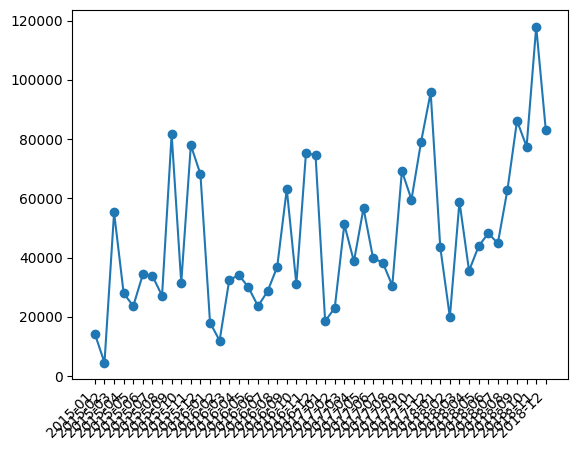

In [ ]:
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

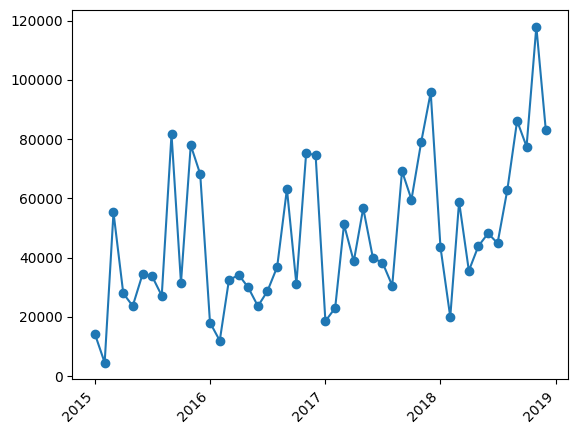

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Example: Convert Month to datetime if not already
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

# Plot the data
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], marker='o', linestyle='-')

# Get current axis
ax = plt.gca()

# Set locator to show one tick per year and format tick labels to display only the year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Optionally, adjust rotation for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df[df['Order Date'].dt.year == 2018]
quarterly_sales = yearly_sales.resample('Q', on='Order Date')['Sales'].sum().reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales': 'Total Sales'})
print(quarterly_sales)

     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


<ipython-input-185-35e0a8478bb3>:3: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



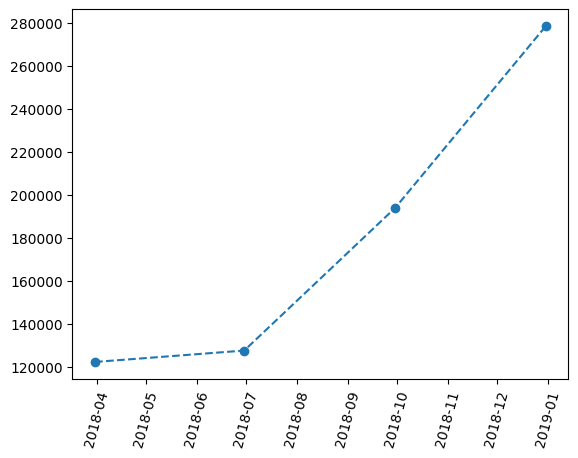

In [ ]:
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle='--')
plt.xticks(rotation=75)
plt.show()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df[df['Order Date'].dt.year == 2018]
month_sales = yearly_sales.resample('M', on='Order Date')['Sales'].sum().reset_index()
month_sales = month_sales.rename(columns={'Order Date': 'Monthly', 'Sales': 'Total Sales'})
print(month_sales)

      Monthly  Total Sales
0  2018-01-31   43476.4740
1  2018-02-28   19920.9974
2  2018-03-31   58863.4128
3  2018-04-30   35541.9101
4  2018-05-31   43825.9822
5  2018-06-30   48190.7277
6  2018-07-31   44825.1040
7  2018-08-31   62837.8480
8  2018-09-30   86152.8880
9  2018-10-31   77448.1312
10 2018-11-30  117938.1550
11 2018-12-31   83030.3888


<ipython-input-187-a979cf495901>:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



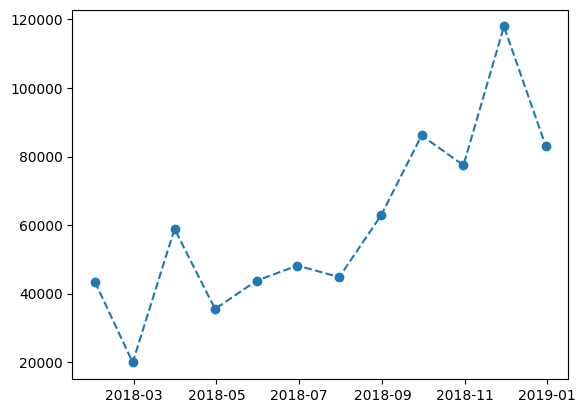

In [ ]:
plt.plot(month_sales['Monthly'], month_sales['Total Sales'], marker='o', linestyle='--') # Use month_sales['Total Sales'] for the y-axis data
#plt.xticks(rotation=75)
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio

# Set renderer for Colab
pio.renderers.default = 'colab'

In [ ]:
#create a mapping for all 50 states

all_state_mapping = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}




In [ ]:
# add the abbreviation column to the dataframe
df['Abbreviation'] = df['State'].map(all_state_mapping)

In [ ]:
#Groupby state and calculate the sum of sales
state_sales = df.groupby('State')['Sales'].sum().reset_index()

In [ ]:
#add abbreviation to state_sales
state_sales['Abbreviation'] = state_sales['State'].map(all_state_mapping)
print(state_sales.head())

        State        Sales Abbreviation
0     Alabama   19510.6400           AL
1     Arizona   35272.6570           AZ
2    Arkansas   11678.1300           AR
3  California  446306.4635           CA
4    Colorado   31841.5980           CO


In [ ]:
#create a choroplth map using plotly
fig = go.Figure(data=go.Choropleth(
    locations=state_sales['Abbreviation'],
    z=state_sales['Sales'],
    locationmode='USA-states',
    colorscale='Reds',
    hoverinfo='location+z',
    showscale=True
))

fig.update_geos(projection_type='albers usa')
fig.update_layout(
    title_text='Total Sales by U.S. State',
    geo_scope='usa',
)

fig.show()

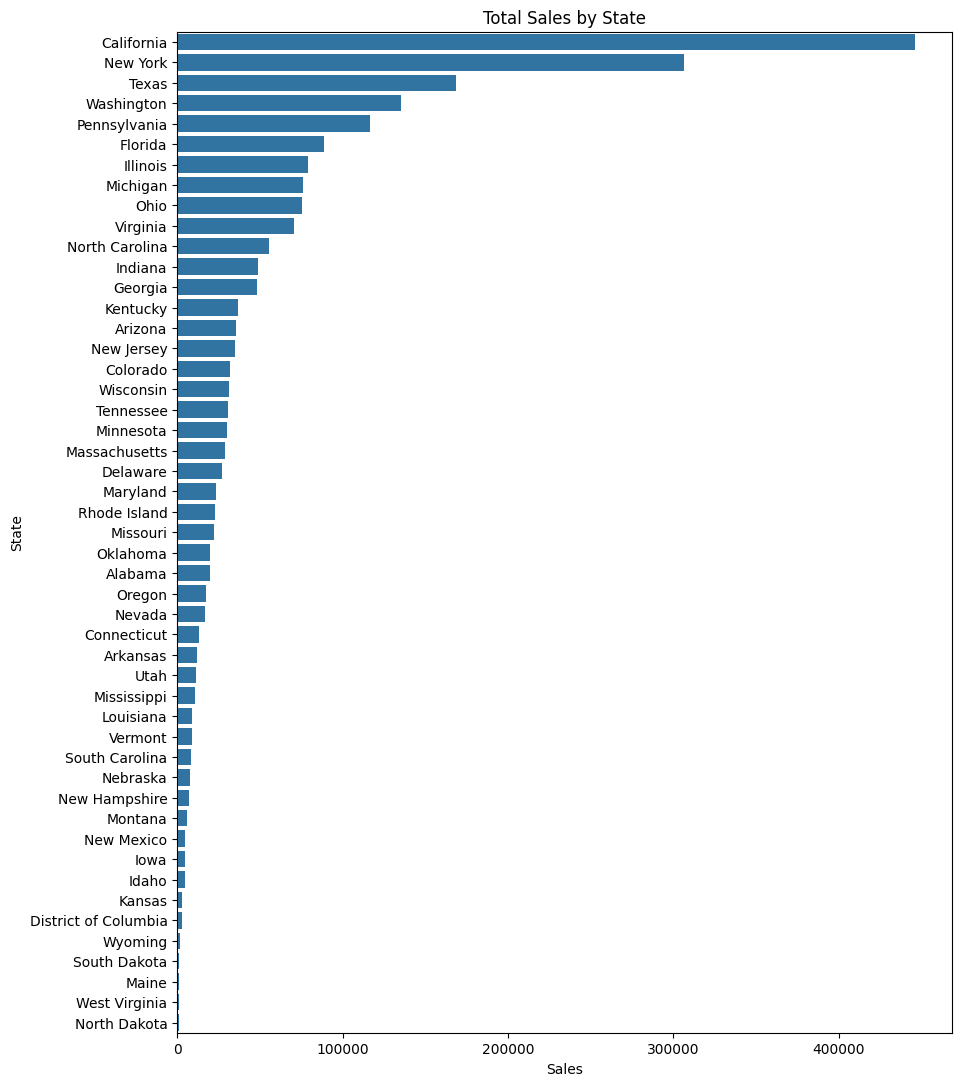

In [ ]:
#sort the dataframe by the sales in desc order
state_sales = state_sales.sort_values(by='Sales', ascending=False)

#create a horinzontal bar graph
plt.figure(figsize=(10, 13))
# Use sns.barplot directly and pass ax as a parameter
sns.barplot(x='Sales', y='State', data=state_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.show()

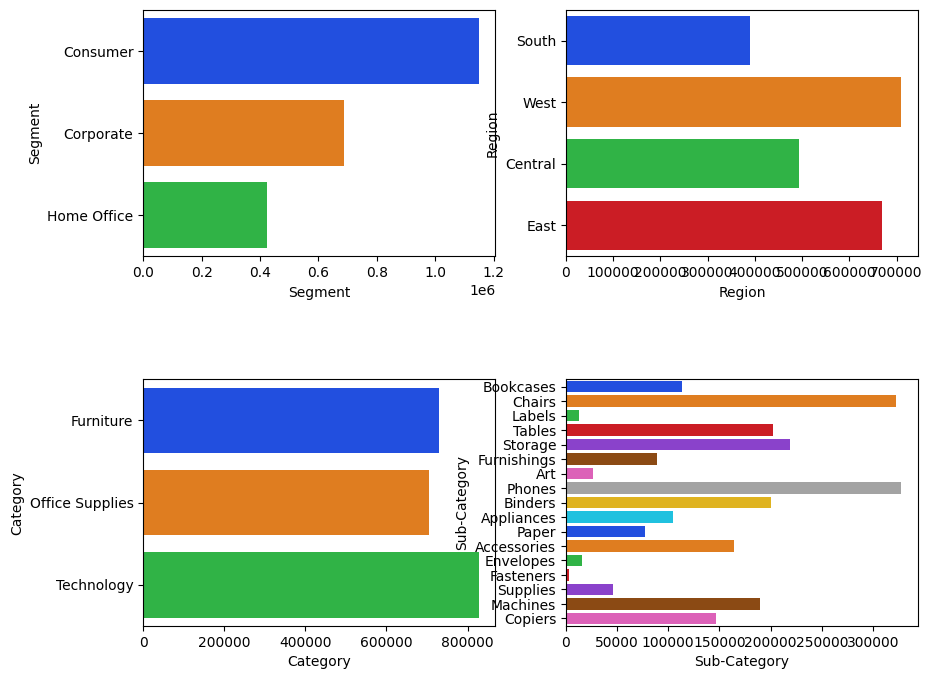

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)

columns = ['Segment', 'Region', 'Category', 'Sub-Category']

for i, column in enumerate(columns):
  ax = axes[i // 2, i%2]
  sns.barplot(x='Sales', y=column, data=df, estimator=np.sum, errorbar= None, palette='bright', ax=ax, hue=column) # Changed line
  ax.set_xlabel(column)
# Removed the second loop as it was redundant and causing the error

In [ ]:
import plotly.express as px

#summarize the sales data by category and sub-category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

#create a nested pie chart
fig = px.sunburst(
    df_summary,
    path=['Category', 'Sub-Category'], values='Sales',
                  #color='Sales', color_continuous_scale='RdBu',
                  title='Sales by Category and Sub-Category'
                  )

fig.show()